In [2]:
import pygplates


# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
#topology_features = pygplates.FeatureCollection('Canon-pygplates-topologies.ipynb')

# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    print "%dMa, total ridge length is %f kms and total subduction zone length is %f kms." % (
            time, total_ridge_length_in_kms, total_subduction_zone_length_in_kms)

0Ma, total ridge length is 98117.844785 kms and total subduction zone length is 57389.427713 kms.
1Ma, total ridge length is 96039.013946 kms and total subduction zone length is 57335.400292 kms.
2Ma, total ridge length is 95321.962749 kms and total subduction zone length is 56870.697101 kms.
3Ma, total ridge length is 94511.177937 kms and total subduction zone length is 58115.855047 kms.
4Ma, total ridge length is 95218.372949 kms and total subduction zone length is 60439.961405 kms.
5Ma, total ridge length is 93972.710433 kms and total subduction zone length is 60086.876432 kms.
6Ma, total ridge length is 98416.121505 kms and total subduction zone length is 60016.396665 kms.
7Ma, total ridge length is 98479.145218 kms and total subduction zone length is 60656.787296 kms.
8Ma, total ridge length is 97089.123526 kms and total subduction zone length is 60693.352617 kms.
9Ma, total ridge length is 97087.358151 kms and total subduction zone length is 59451.277591 kms.
10Ma, total ridge le

In [3]:
#CODE TO CALCULATE ONLY THE SPREADING RIDGE PLATE BOUNDARY LENGTH FOR EACH 1 MYA

# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
#rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')
rotation_model = pygplates.RotationModel('Seton_etal_ESR2012_2012.1.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    print "%d, %f" % (
            time, total_ridge_length_in_kms)

0, 98117.844785
1, 96029.723151
2, 95750.357429
3, 95380.160041
4, 96093.548138
5, 95499.551821
6, 100868.808241
7, 100839.542502
8, 99705.340515
9, 101144.543053
10, 101435.803114
11, 99503.338911
12, 97690.816659
13, 97044.676797
14, 97149.894863
15, 103844.428575
16, 99064.097359
17, 100582.939397
18, 99597.314200
19, 99384.630580
20, 99667.365297
21, 101277.200628
22, 101972.022867
23, 101267.071724
24, 101777.020719
25, 98957.262675
26, 111872.752055
27, 113801.714446
28, 108177.479786
29, 109622.787832
30, 109552.468807
31, 104569.344167
32, 104324.058249
33, 109840.365292
34, 113417.854422
35, 117680.850073
36, 116371.882301
37, 114357.015610
38, 117133.528924
39, 117075.639355
40, 115872.280179
41, 104673.012010
42, 104855.703142
43, 104840.293394
44, 108924.321988
45, 107720.565808
46, 110484.743487
47, 113332.439346
48, 109693.624361
49, 106483.496138
50, 106496.069813
51, 102832.548029
52, 116144.310136
53, 118273.593743
54, 117840.889637
55, 118087.746488
56, 128136.129809


In [4]:
#CODE TO CALCULATE ONLY THE SPREADING RIDGE PLATE BOUNDARY LENGTH FOR EACH 1 MYA

# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
#topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

Spreadinglength = [] 

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    #print "%d" % (
     #       time)
    #print "%f" % (
     #        total_ridge_length_in_kms)
    
    Spreadinglength.append(total_ridge_length_in_kms) 
    
    

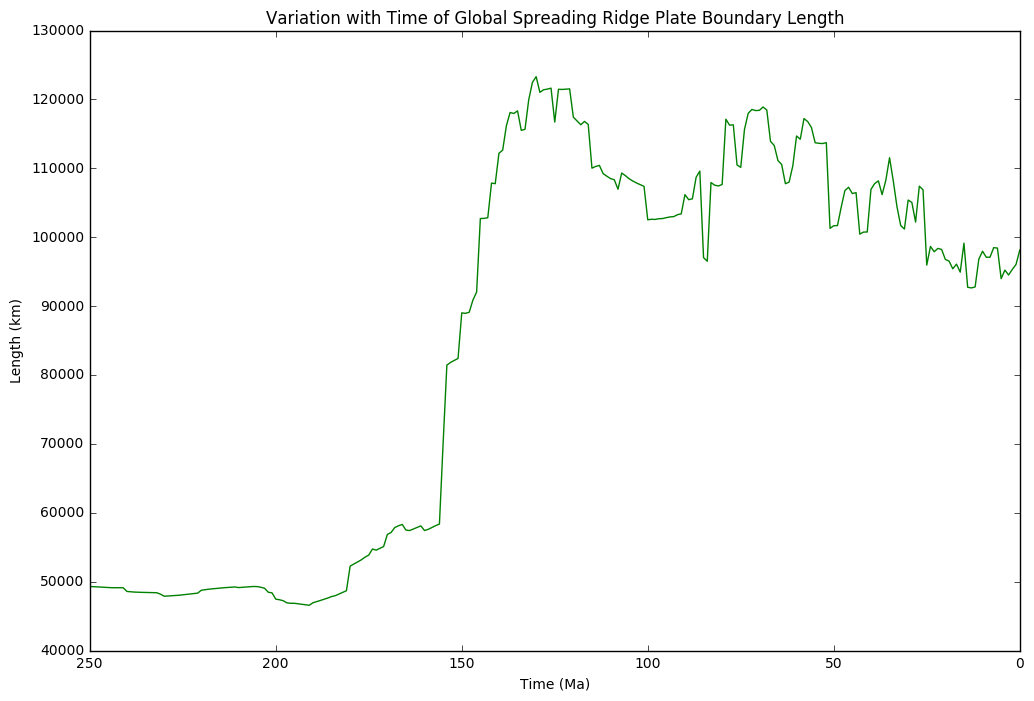

In [5]:
#Plotting
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps + 1),Spreadinglength,'g')
#plt.gca().invert_xaxis()
plt.title('Variation with Time of Global Spreading Ridge Plate Boundary Length')
plt.xlabel('Time (Ma)')
plt.ylabel('Length (km)')
plt.gca().invert_xaxis()

plt.show()

In [10]:
#CODE TO CALCULATE ONLY THE SPREADING RIDGE PLATE BOUNDARY LENGTH FOR EACH 1 MYA AND 250 MYA. 
#calculate the lenght of only spreading part of the boundary and slow and ultraslow

import matplotlib.pyplot as plt


# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    
    #Apply a unversal value for total length of only spreading ridge calibrated using the current lenght at 0 Mya
    #Choice of 0.70 as assumtion current spreading lenght is approx 66000 km and total lenght is 98117. this represents approx 70 percent
    total_ridge_length_spreading_in_kms = (total_ridge_length_in_kms * 0.70)
    
    #Slow Spreading ridge less than 40 mm per year is about 50 percent of spreading ridge
    slow_spreading = (total_ridge_length_spreading_in_kms * 0.50)
    
    # Model A Serpentinization 
    # Model improvement from Soroktin calculations

    # Initial parameters

    from decimal import Decimal

    #Srp_production_totalspreading = []
    #Srp_production_70spreading = []
    #Srp_production_30spreading = []

    # Global average spreading rate in cm/yr
    spreading_rate_cmyr = 4.5
    spreading_rate_kmyr = spreading_rate_cmyr/100000

    # total reactive depth of ultramafic rocks
    ultramafic_thickness = 2

    # density serpentine g/cm^3
    serpentine_density = 2.7
    serpentine_densitygkm3 = serpentine_density * 100000**3

    #Calculation Global rate of production of serpentine with time
    productiontotal_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_in_kms * serpentine_densitygkm3
    production70_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_spreading_in_kms * serpentine_densitygkm3
    production30_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * slow_spreading * serpentine_densitygkm3

    
    print "%d, %f, %f, %f, %f, %f, %f" % (
        time, total_ridge_length_in_kms, total_ridge_length_spreading_in_kms, slow_spreading,productiontotal_serp_gmyr, production70_serp_gmyr, production30_serp_gmyr)
        
        

0, 98117.844785, 68682.491349, 34341.245675, 23842636282676608.000000, 16689845397873626.000000, 8344922698936813.000000
1, 96039.013946, 67227.309762, 33613.654881, 23337480388849404.000000, 16336236272194582.000000, 8168118136097291.000000
2, 95321.962749, 66725.373925, 33362.686962, 23163236948087296.000000, 16214265863661104.000000, 8107132931830552.000000
3, 94511.177937, 66157.824556, 33078.912278, 22966216238804120.000000, 16076351367162884.000000, 8038175683581442.000000
4, 95218.372949, 66652.861065, 33326.430532, 23138064626724832.000000, 16196645238707386.000000, 8098322619353693.000000
5, 93972.710433, 65780.897303, 32890.448652, 22835368635194892.000000, 15984758044636426.000000, 7992379022318213.000000
6, 98416.121505, 68891.285054, 34445.642527, 23915117525828532.000000, 16740582268079968.000000, 8370291134039984.000000
7, 98479.145218, 68935.401653, 34467.700826, 23930432287959492.000000, 16751302601571642.000000, 8375651300785821.000000
8, 97089.123526, 67962.386468, 3

In [6]:
#CODE TO CALCULATE ONLY THE SPREADING RIDGE PLATE BOUNDARY LENGTH FOR EACH 1 MYA AND 250 MYA. 
#calculate the lenght of only spreading part of the boundary and slow and ultraslow segments

import matplotlib.pyplot as plt


# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

Spreadinglength = []
Spreadinglength70 = []
Slow_spreadinglength30 = []

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    
    #Apply a unversal value for total length of only spreading ridge calibrated using the current lenght at 0 Mya
    #Choice of 0.70 as assumtion current spreading lenght is approx 66000 km and total lenght is 98117. this represents approx 70 percent
    total_ridge_length_spreading_in_kms = (total_ridge_length_in_kms * 0.70)
    
    #Slow Spreading ridge less than 40 mm per year is about 50 percent of spreading ridge
    slow_spreading = (total_ridge_length_spreading_in_kms * 0.50)
    
   # print "%d, %f, %f, %f" % (
    #       time, total_ridge_length_in_kms, total_ridge_length_spreading_in_kms, slow_spreading)
        

    #Saves in memory for plotting later 
    Spreadinglength.append(total_ridge_length_in_kms) 
    Spreadinglength70.append(total_ridge_length_spreading_in_kms)
    Slow_spreadinglength30.append(slow_spreading)
    
    

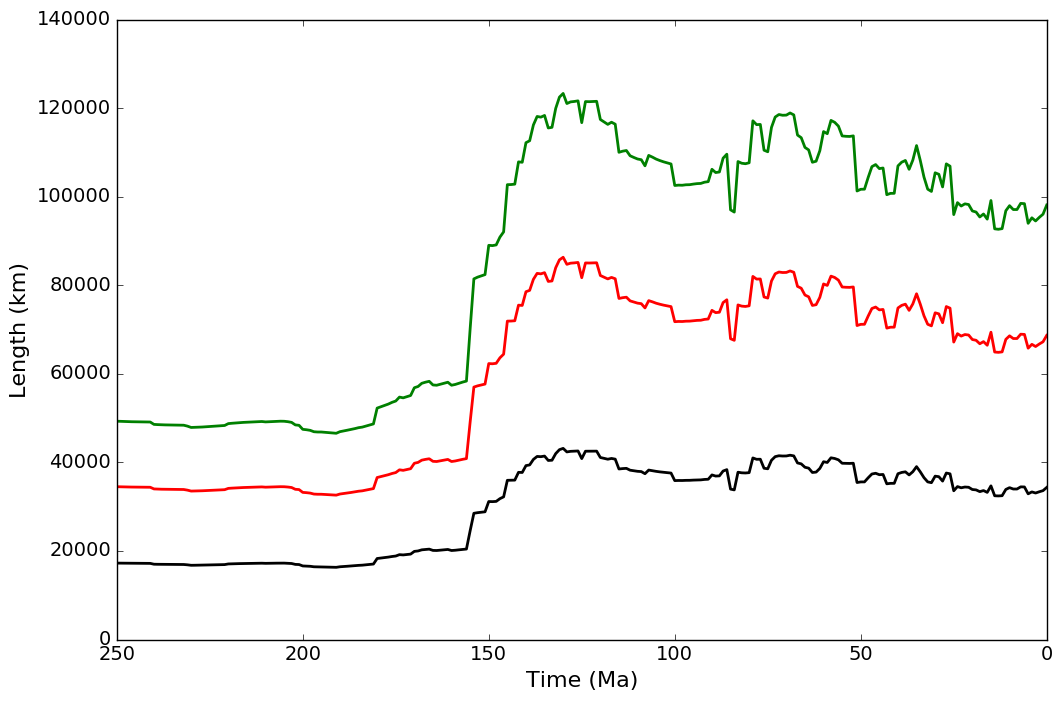

In [8]:
#Plotting

plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps + 1),Spreadinglength,'g',linewidth=2)
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Spreadinglength70,'r',linewidth=2)
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Slow_spreadinglength30,'k',linewidth=2)
#plt.gca().invert_xaxis()
#plt.title('Variation with Time of Global Spreading Ridge Plate Boundary Length',fontsize=18)
#hfont = {'fontname':'Helvetica'}
plt.xlabel('Time (Ma)',fontsize=16)
plt.ylabel('Length (km)',fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.gca().invert_xaxis()

plt.show()

#plt.savefig('Variation with Time.pdf',transparent=True)

In [9]:
# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

Srp100 = []
Srp70 = []
Srp30 = []
Srp100_4 = []
Srp70_4 = []
Srp30_4 = []

#Spreadinglength = []
#Spreadinglength70 = []
#Slow_spreadinglength30 = []

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    
    #Apply a unversal value for total length of only spreading ridge calibrated using the current lenght at 0 Mya
    #Choice of 0.70 as assumtion current spreading lenght is approx 66000 km and total lenght is 98117. this represents approx 70 percent
    total_ridge_length_spreading_in_kms = (total_ridge_length_in_kms * 0.70)
    
    #Slow Spreading ridge less than 40 mm per year is about 50 percent of spreading ridge
    slow_spreading = (total_ridge_length_spreading_in_kms * 0.50)
    
   # print "%d, %f, %f, %f" % (
    #       time, total_ridge_length_in_kms, total_ridge_length_spreading_in_kms, slow_spreading)
        

    #Saves in memory for plotting later 
    #Spreadinglength.append(total_ridge_length_in_kms) 
    #Spreadinglength70.append(total_ridge_length_spreading_in_kms)
    #Slow_spreadinglength30.append(slow_spreading)
    

    # Model A Serpentinization 
    # Model improvement from Soroktin calculations

    # Initial parameters

    from decimal import Decimal

    
    # Global average spreading rate in cm/yr
    spreading_rate_cmyr = 4.5
    spreading_rate_kmyr = spreading_rate_cmyr/100000

    # total reactive depth of ultramafic rocks
    ultramafic_thickness = 2
    ultramafic_thickness4 = 4

    # density serpentine g/cm^3
    serpentine_density = 2.7
    serpentine_densitygkm3 = serpentine_density * 100000**3

    #Calculation Global rate of production of serpentine with time
    productiontotal_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_in_kms * serpentine_densitygkm3
    production70_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_spreading_in_kms * serpentine_densitygkm3
    production30_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * slow_spreading * serpentine_densitygkm3
    productiontotal_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * total_ridge_length_in_kms * serpentine_densitygkm3
    production70_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * total_ridge_length_spreading_in_kms * serpentine_densitygkm3
    production30_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * slow_spreading * serpentine_densitygkm3

    #print "%.2E km/yr is spreading rate use for model A; %.2E km is the reactive thickness used in the model; %.2E g/km3 density of serpentine" % (
            #spreading_rate_kmyr, ultramafic_thickness, serpentine_densitygkm3)


    print "%d, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E" %(
        time, productiontotal_serp_gmyr, production70_serp_gmyr, production30_serp_gmyr,productiontotal_serp_gmyr4, production70_serp_gmyr4, production30_serp_gmyr4)
    
    Srp100.append(productiontotal_serp_gmyr) 
    Srp70.append(production70_serp_gmyr)
    Srp30.append(production30_serp_gmyr)
    Srp100_4.append(productiontotal_serp_gmyr4) 
    Srp70_4.append(production70_serp_gmyr4)
    Srp30_4.append(production30_serp_gmyr4)

0, 2.38E+16, 1.67E+16, 8.34E+15, 4.77E+16, 3.34E+16, 1.67E+16
1, 2.33E+16, 1.63E+16, 8.17E+15, 4.67E+16, 3.27E+16, 1.63E+16
2, 2.32E+16, 1.62E+16, 8.11E+15, 4.63E+16, 3.24E+16, 1.62E+16
3, 2.30E+16, 1.61E+16, 8.04E+15, 4.59E+16, 3.22E+16, 1.61E+16
4, 2.31E+16, 1.62E+16, 8.10E+15, 4.63E+16, 3.24E+16, 1.62E+16
5, 2.28E+16, 1.60E+16, 7.99E+15, 4.57E+16, 3.20E+16, 1.60E+16
6, 2.39E+16, 1.67E+16, 8.37E+15, 4.78E+16, 3.35E+16, 1.67E+16
7, 2.39E+16, 1.68E+16, 8.38E+15, 4.79E+16, 3.35E+16, 1.68E+16
8, 2.36E+16, 1.65E+16, 8.26E+15, 4.72E+16, 3.30E+16, 1.65E+16
9, 2.36E+16, 1.65E+16, 8.26E+15, 4.72E+16, 3.30E+16, 1.65E+16
10, 2.38E+16, 1.67E+16, 8.33E+15, 4.76E+16, 3.33E+16, 1.67E+16
11, 2.35E+16, 1.65E+16, 8.23E+15, 4.71E+16, 3.29E+16, 1.65E+16
12, 2.25E+16, 1.58E+16, 7.89E+15, 4.51E+16, 3.16E+16, 1.58E+16
13, 2.25E+16, 1.58E+16, 7.88E+15, 4.50E+16, 3.15E+16, 1.58E+16
14, 2.25E+16, 1.58E+16, 7.89E+15, 4.51E+16, 3.15E+16, 1.58E+16
15, 2.41E+16, 1.69E+16, 8.43E+15, 4.82E+16, 3.37E+16, 1.69E+16
16

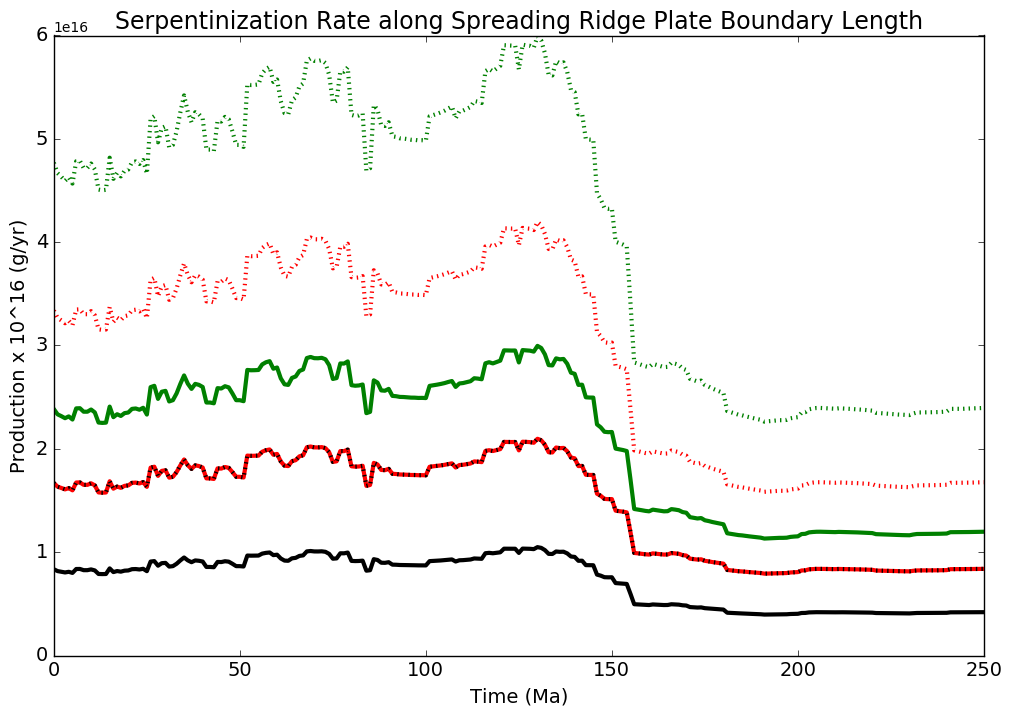

In [15]:
#Plotting Serpentinization Production
import matplotlib.pyplot as plt
import numpy as np

#
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps+1),Srp100,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps+1),Srp100_4,'g',linewidth=3, ls=':')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp70,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp70_4,'r',linewidth=3,ls=':')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp30,'k',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp30_4,'k',linewidth=3,ls=':')
plt.gca().invert_xaxis()



plt.title('Serpentinization Rate along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^16 (g/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.gca().invert_xaxis()

plt.show()

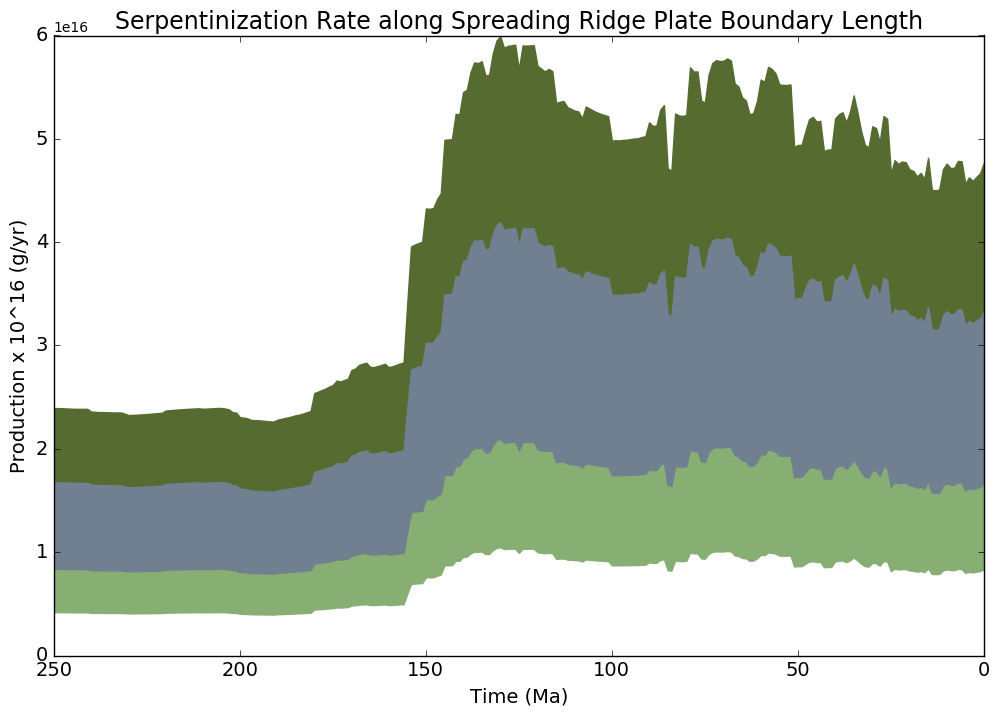

In [22]:
#Plotting Serpentinization Production
import matplotlib.pyplot as plt
import numpy as np

#
plt.figure(figsize=(12,8))


#Fill between gradients from 2 to 4 km
plt.fill_between(np.arange(0,num_time_steps + 1),Srp100,Srp100_4,color='darkolivegreen', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Srp30,Srp30_4,color='sage', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Srp70,Srp70_4,color='slategray', alpha = 1)
plt.gca().invert_xaxis()

plt.title('Serpentinization Rate along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^16 (g/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

#plt.savefig('Serpentinization Variation with Time.svg',transparent=True)


In [10]:
# Load one or more rotation files into a rotation model.
#rotation_model = pygplates.RotationModel('Global_EarthByte_230-0Ma_GK07_AREPS.rot')
rotation_model = pygplates.RotationModel('Global_EB_250-0Ma_GK07_Matthews++.rot')

# Load the topological plate polygon features (can also include deforming networks).
topology_features = pygplates.FeatureCollection('Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
# topology_features = pygplates.FeatureCollection('Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml')

# Our geological times will be from 0Ma to 'num_time_steps' Ma (inclusive) in 1 My intervals.
num_time_steps = 250

Srp100 = []
Srp70 = []
Srp30 = []
Srp100_4 = []
Srp70_4 = []
Srp30_4 = []
Hydrogen100 = []
Hydrogen70 = []
Hydrogen30 = []
Hydrogen100_4 = []
Hydrogen70_4 = []
Hydrogen30_4 = []
Methane100 = []
Methane70 = []
Methane30 = []
Methane100_4 = []
Methane70_4 = []
Methane30_4 = []

#Spreadinglength = []
#Spreadinglength70 = []
#Slow_spreadinglength30 = []

# 'time' = 0, 1, 2, ... , 140
for time in range(num_time_steps + 1):

    # Resolve our topological plate polygons (and deforming networks) to the current 'time'.
    # We generate both the resolved topology boundaries and the boundary sections between them.
    resolved_topologies = []
    shared_boundary_sections = []
    pygplates.resolve_topologies(topology_features, rotation_model, resolved_topologies, time, shared_boundary_sections)

    # We will accumulate the total ridge and subduction zone lengths for the current 'time'.
    total_ridge_length = 0
    total_subduction_zone_length = 0

    # Iterate over the shared boundary sections.
    for shared_boundary_section in shared_boundary_sections:

        # Skip sections that are not ridges or subduction zones.
        if (shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_subduction_zone and
            shared_boundary_section.get_feature().get_feature_type() != pygplates.FeatureType.gpml_mid_ocean_ridge):
            continue

        # Iterate over the shared sub-segments to accumulate their lengths.
        shared_sub_segments_length = 0
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():

            # Each sub-segment has a polyline with a length.
            shared_sub_segments_length += shared_sub_segment.get_resolved_geometry().get_arc_length()

        # The shared sub-segments contribute either to the ridges or to the subduction zones.
        if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
            total_ridge_length += shared_sub_segments_length
        else:
            total_subduction_zone_length += shared_sub_segments_length

    # The lengths are for a unit-length sphere so we must multiple by the Earth's radius.
    total_ridge_length_in_kms = total_ridge_length * pygplates.Earth.mean_radius_in_kms
    total_subduction_zone_length_in_kms = total_subduction_zone_length * pygplates.Earth.mean_radius_in_kms

    
    #Apply a unversal value for total length of only spreading ridge calibrated using the current lenght at 0 Mya
    #Choice of 0.70 as assumtion current spreading lenght is approx 66000 km and total lenght is 98117. this represents approx 70 percent
    total_ridge_length_spreading_in_kms = (total_ridge_length_in_kms * 0.70)
    
    #Slow Spreading ridge less than 40 mm per year is about 50 percent of spreading ridge
    slow_spreading = (total_ridge_length_spreading_in_kms * 0.50)
    
   # print "%d, %f, %f, %f" % (
    #       time, total_ridge_length_in_kms, total_ridge_length_spreading_in_kms, slow_spreading)
        

    #Saves in memory for plotting later 
    #Spreadinglength.append(total_ridge_length_in_kms) 
    #Spreadinglength70.append(total_ridge_length_spreading_in_kms)
    #Slow_spreadinglength30.append(slow_spreading)
    

    # Model B Serpentinization 
    # Model using chemical equation of Worman and assuming 50% completion (Sleep and Bird 2007)

    # Initial parameters

    from decimal import Decimal

    
    # Global average spreading rate in cm/yr
    spreading_rate_cmyr = 4.5
    spreading_rate_kmyr = spreading_rate_cmyr/100000

    # total reactive depth of ultramafic rocks
    ultramafic_thickness = 2
    ultramafic_thickness4 = 4

    # density serpentine g/cm^3
    serpentine_density = 2.7
    serpentine_densitygkm3 = serpentine_density * 100000**3

    #Calculation Global rate of production of serpentine with time
    productiontotal_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_in_kms * serpentine_densitygkm3
    production70_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * total_ridge_length_spreading_in_kms * serpentine_densitygkm3
    production30_serp_gmyr = spreading_rate_kmyr * ultramafic_thickness * slow_spreading * serpentine_densitygkm3
    productiontotal_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * total_ridge_length_in_kms * serpentine_densitygkm3
    production70_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * total_ridge_length_spreading_in_kms * serpentine_densitygkm3
    production30_serp_gmyr4 = spreading_rate_kmyr * ultramafic_thickness4 * slow_spreading * serpentine_densitygkm3

    #print "%.2E km/yr is spreading rate use for model A; %.2E km is the reactive thickness used in the model; %.2E g/km3 density of serpentine" % (
            #spreading_rate_kmyr, ultramafic_thickness, serpentine_densitygkm3)


    #print "%d, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E" %(
        #time, productiontotal_serp_gmyr, production70_serp_gmyr, production30_serp_gmyr,productiontotal_serp_gmyr4, production70_serp_gmyr4, production30_serp_gmyr4)
    
    Srp100.append(productiontotal_serp_gmyr) 
    Srp70.append(production70_serp_gmyr)
    Srp30.append(production30_serp_gmyr)
    Srp100_4.append(productiontotal_serp_gmyr4) 
    Srp70_4.append(production70_serp_gmyr4)
    Srp30_4.append(production30_serp_gmyr4)
    
    #Calculation of hydrogen and methane

    #Calculation Global rate of production of serpentine with time
    
    # Following calculation method of Soroktin 2001 whereby we input degrees of serpentinization (deg_serp) 
    # gloabl rate of oceanic crust from above, concnetration of FeO, molar weight of hydrogen and molar weight of FeO
    
    
    #Variables input
    
    deg_serp = 0.5
    FeO_to_H2 = 0.5
    molar_H2 = 2.016
    molar_FeO = 71.844
    molar_CH4 = 16.04
    
    #Following the reaction as written 15 (Mg1.8Fe0.2)SiO4 + 20.5H2O -> 7.5Mg3Si2O5(OH4) + 4:5MgOH2 + Fe3O4 + H2

    #Following equation rate = (deg_serp * spreading serp rate * expenditure rate * molar weight of hydrogen)/molar weight FeO
    #Result in mol/yr
    
    hydrogen_productiontotal_serp_gmyr = (productiontotal_serp_gmyr * deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)
    hydrogen_production70_serp_gmyr = (production70_serp_gmyr* deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)
    hydrogen_production30_serp_gmyr = (production30_serp_gmyr* deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)
    hydrogen_productiontotal_serp_gmyr4 = (productiontotal_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)
    hydrogen_production70_serp_gmyr4 = (production70_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)
    hydrogen_production30_serp_gmyr4 = (production30_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_H2)/(7*molar_FeO*molar_H2)

    #Following the reaction $Fe2SiO4 + 12Mg2SiO4 + 18 H2O + CO2 => 4Mg6[Si4O10](OH)8 + 4Fe2O3 + CH4
    # Result in mol/yr
    methane_productiontotal_serp_gmyr = (productiontotal_serp_gmyr * deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    methane_production70_serp_gmyr = (production70_serp_gmyr* deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    methane_production30_serp_gmyr = (production30_serp_gmyr* deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    methane_productiontotal_serp_gmyr4 = (productiontotal_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    methane_production70_serp_gmyr4 = (production70_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    methane_production30_serp_gmyr4 = (production30_serp_gmyr4 * deg_serp * FeO_to_H2 * molar_CH4)/(8*molar_FeO*molar_CH4)
    
    #print "%.2E km/yr is spreading rate use for model A; %.2E km is the reactive thickness used in the model; %.2E g/km3 density of serpentine" % (
            #spreading_rate_kmyr, ultramafic_thickness, serpentine_densitygkm3)


    print "%d, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E, %.2E" %(
        time, productiontotal_serp_gmyr, production70_serp_gmyr, production30_serp_gmyr,hydrogen_productiontotal_serp_gmyr, hydrogen_production70_serp_gmyr, hydrogen_production30_serp_gmyr, hydrogen_productiontotal_serp_gmyr4, hydrogen_production70_serp_gmyr4, hydrogen_production30_serp_gmyr4, methane_productiontotal_serp_gmyr, methane_production70_serp_gmyr, methane_production30_serp_gmyr, methane_productiontotal_serp_gmyr4, methane_production70_serp_gmyr4, methane_production30_serp_gmyr4)
    
    Hydrogen100.append(hydrogen_productiontotal_serp_gmyr) 
    Hydrogen70.append(hydrogen_production70_serp_gmyr)
    Hydrogen30.append(hydrogen_production30_serp_gmyr)
    Hydrogen100_4.append(hydrogen_productiontotal_serp_gmyr4)
    Hydrogen70_4.append(hydrogen_production70_serp_gmyr4)
    Hydrogen30_4.append(hydrogen_production30_serp_gmyr4)
    Methane100.append(methane_productiontotal_serp_gmyr)
    Methane70.append(methane_production70_serp_gmyr)
    Methane30.append(methane_production30_serp_gmyr)
    Methane100_4.append(methane_productiontotal_serp_gmyr4)
    Methane70_4.append(methane_production70_serp_gmyr4)
    Methane30_4.append(methane_production30_serp_gmyr4)

0, 2.38E+16, 1.67E+16, 8.34E+15, 1.19E+13, 8.30E+12, 4.15E+12, 2.37E+13, 1.66E+13, 8.30E+12, 1.04E+13, 7.26E+12, 3.63E+12, 2.07E+13, 1.45E+13, 7.26E+12
1, 2.33E+16, 1.63E+16, 8.17E+15, 1.16E+13, 8.12E+12, 4.06E+12, 2.32E+13, 1.62E+13, 8.12E+12, 1.02E+13, 7.11E+12, 3.55E+12, 2.03E+13, 1.42E+13, 7.11E+12
2, 2.32E+16, 1.62E+16, 8.11E+15, 1.15E+13, 8.06E+12, 4.03E+12, 2.30E+13, 1.61E+13, 8.06E+12, 1.01E+13, 7.05E+12, 3.53E+12, 2.02E+13, 1.41E+13, 7.05E+12
3, 2.30E+16, 1.61E+16, 8.04E+15, 1.14E+13, 7.99E+12, 4.00E+12, 2.28E+13, 1.60E+13, 7.99E+12, 9.99E+12, 6.99E+12, 3.50E+12, 2.00E+13, 1.40E+13, 6.99E+12
4, 2.31E+16, 1.62E+16, 8.10E+15, 1.15E+13, 8.05E+12, 4.03E+12, 2.30E+13, 1.61E+13, 8.05E+12, 1.01E+13, 7.05E+12, 3.52E+12, 2.01E+13, 1.41E+13, 7.05E+12
5, 2.28E+16, 1.60E+16, 7.99E+15, 1.14E+13, 7.95E+12, 3.97E+12, 2.27E+13, 1.59E+13, 7.95E+12, 9.93E+12, 6.95E+12, 3.48E+12, 1.99E+13, 1.39E+13, 6.95E+12
6, 2.39E+16, 1.67E+16, 8.37E+15, 1.19E+13, 8.32E+12, 4.16E+12, 2.38E+13, 1.66E+13, 8.32E

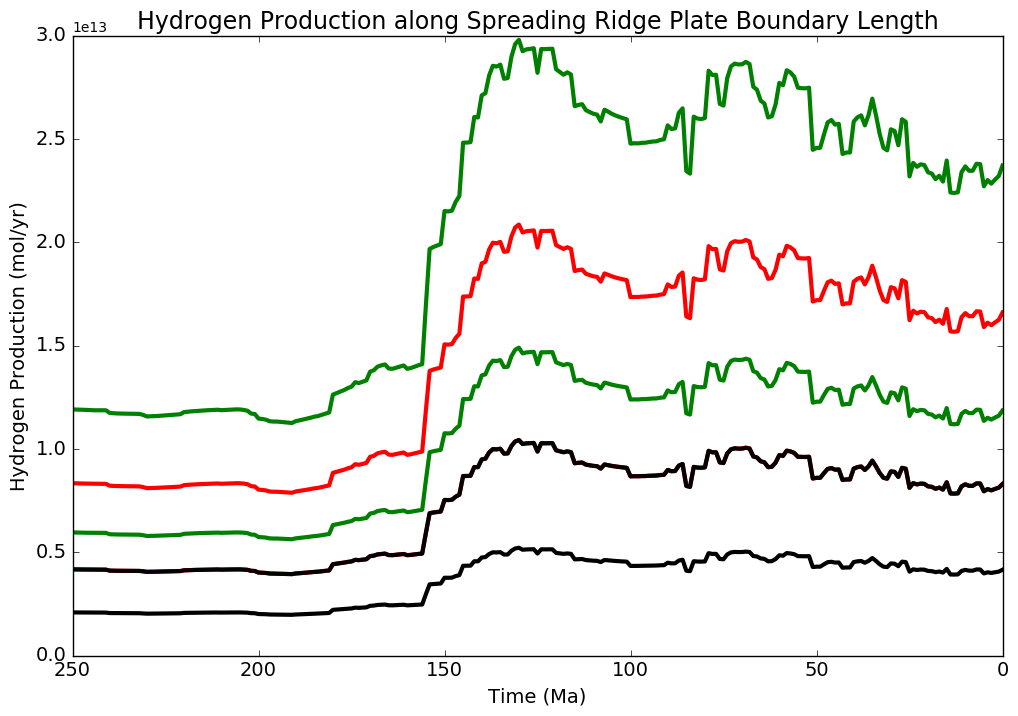

In [13]:
#
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps+1),Hydrogen100,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps+1),Hydrogen100_4,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Hydrogen70,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Hydrogen70_4,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Hydrogen30,'k',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Hydrogen30_4,'k',linewidth=3,ls='-')
plt.gca().invert_xaxis()



plt.title('Hydrogen Production along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Hydrogen Production (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

In [145]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [26]:
#Plotting Hydrogen and Methane Production
from matplotlib.pyplot import figure, show, cm
from numpy import arange
from numpy.random import rand
plt.figure(figsize=(12,8))


#Fill between gradients from 2 to 4 km
plt.fill_between(np.arange(0,num_time_steps + 1),Hydrogen100,Hydrogen100_4,color='darkolivegreen', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Hydrogen30,Hydrogen30_4,color='sage', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Hydrogen70,Hydrogen70_4,color='slategray', alpha = 1)
plt.gca().invert_xaxis()

#plt.title('H2 production along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('H2 Production (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

#plt.show()

plt.savefig('H2 Variation with Time 250 to 0.svg',transparent=True)



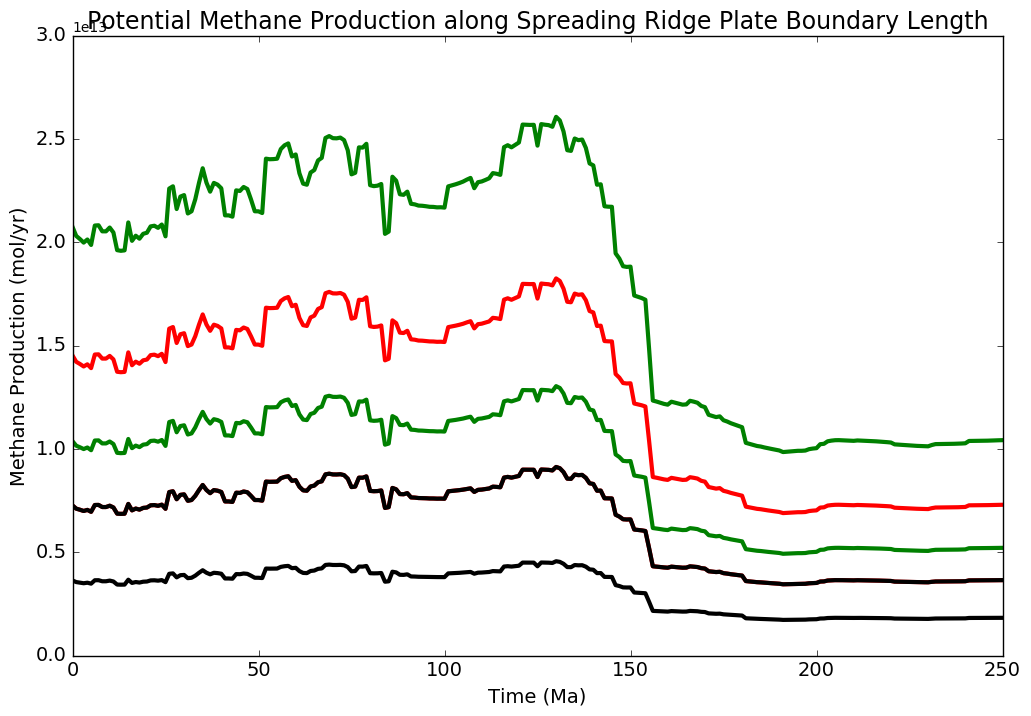

In [23]:
#
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps+1),Methane100,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps+1),Methane100_4,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Methane70,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Methane70_4,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Methane30,'k',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Methane30_4,'k',linewidth=3,ls='-')
plt.gca().invert_xaxis()



plt.title('Potential Methane Production along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Methane Production (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.gca().invert_xaxis()

plt.show()

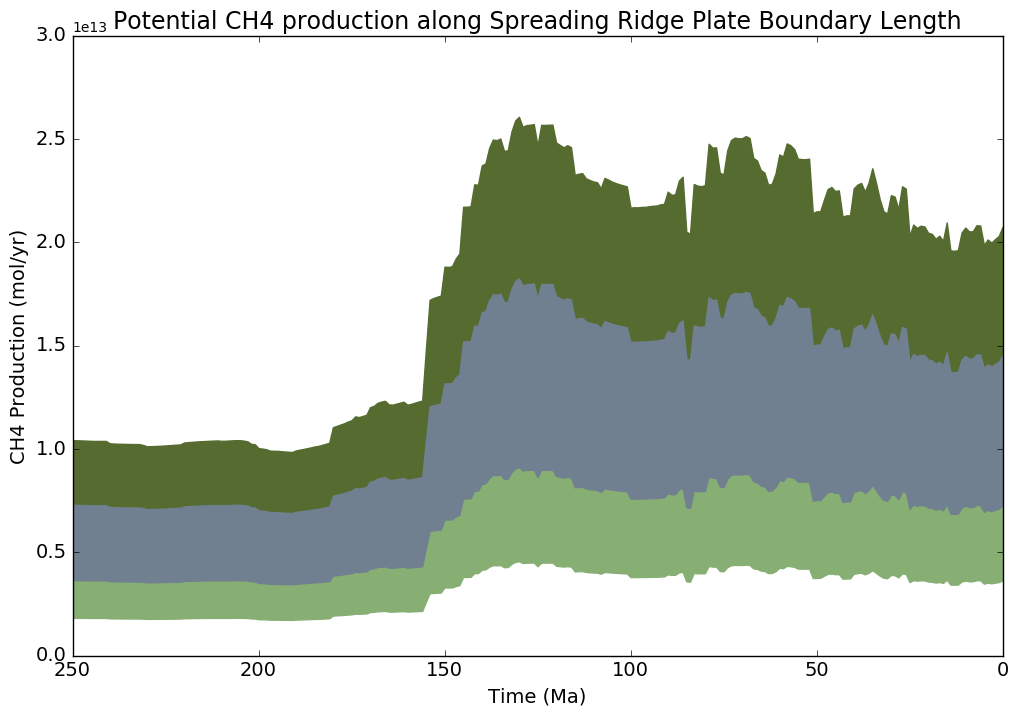

In [24]:
#Plotting Hydrogen and Methane Production

plt.figure(figsize=(12,8))


#Fill between gradients from 2 to 4 km
plt.fill_between(np.arange(0,num_time_steps + 1),Methane100,Methane100_4,color='darkolivegreen', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Methane30,Methane30_4,color='sage', alpha = 1)
plt.fill_between(np.arange(0,num_time_steps + 1),Methane70,Methane70_4,color='slategray', alpha = 1)
plt.gca().invert_xaxis()

plt.title('Potential CH4 production along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('CH4 Production (mol/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


plt.show()

In [27]:
print sum(Hydrogen100)
print sum(Hydrogen100_4)
print sum(Hydrogen30_4)

2.58275771687e+15
5.16551543373e+15
1.80793040181e+15


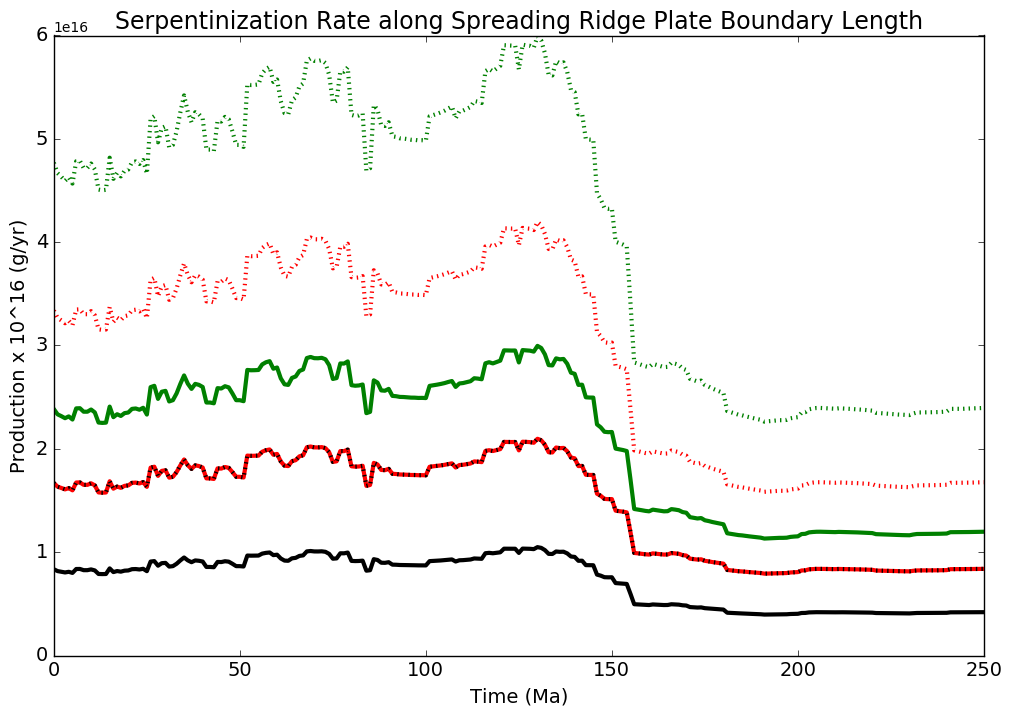

In [89]:
#Plotting Serpentinization Production
import matplotlib.pyplot as plt
import numpy as np

#
plt.figure(figsize=(12,8))
plt.plot(np.arange(0,num_time_steps+1),Srp100,'g',linewidth=3, ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps+1),Srp100_4,'g',linewidth=3, ls=':')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp70,'r',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp70_4,'r',linewidth=3,ls=':')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp30,'k',linewidth=3,ls='-')
plt.hold(True)
plt.plot(np.arange(0,num_time_steps + 1),Srp30_4,'k',linewidth=3,ls=':')
plt.gca().invert_xaxis()



plt.title('Serpentinization Rate along Spreading Ridge Plate Boundary Length',fontsize=17)
plt.xlabel('Time (Ma)',fontsize=14)
plt.ylabel('Production x 10^16 (g/yr)',fontsize=14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.gca().invert_xaxis()

plt.show()

In [1]:
import plotly 

ImportError: No module named plotly